# Unscented Kalman filter analysis

In [154]:
%matplotlib inline
import numpy as np
import pandas
from scipy import stats
from matplotlib import pyplot as plt;

In [155]:
df = pandas.read_csv("build/dump.csv", header=None, 
                     names=['Sensor', 'px', 'py', 'vx', 'vy', "px_est", 'py_est', 'vx_est', 'vy_est', 'NIS'])
df.head()

,Sensor,px,py,vx,vy,px_est,py_est,vx_est,vy_est,NIS
0,L,0.600000,0.600000,5.19994,0.000000,0.312243,0.580340,10.00000,0.000000,0.000000
1,R,0.859997,0.600045,5.19975,0.001797,0.633714,-0.543432,8.94742,-0.731541,0.578904
2,L,1.119980,0.600225,5.19943,0.005390,1.188130,0.456059,7.94279,-3.204290,1.118790
3,R,1.379960,0.600629,5.19898,0.010778,1.374760,0.572580,5.28611,0.031673,4.481700
4,L,1.639900,0.601347,5.19839,0.017960,1.633900,0.575956,5.16612,0.312771,0.160688


In [156]:
df.describe()

,px,py,vx,vy,px_est,py_est,vx_est,vy_est,NIS
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,-3.182320,5.742852,-0.303756,0.413017,-3.174478,5.723767,-0.237303,0.312507,2.264067
std,15.220143,9.125098,3.732661,3.296976,15.225412,9.110682,3.750550,3.288397,2.391393
min,-26.650000,-9.627170,-4.880530,-4.909760,-26.645000,-9.526260,-5.032120,-5.082630,0.000000
25%,-16.843000,-0.244976,-3.660375,-2.799180,-16.773450,-0.414901,-3.552785,-2.950155,0.739581
50%,-3.147090,5.684140,-1.786860,0.774927,-3.061250,5.725150,-1.674600,0.655630,1.658100
75%,10.463200,11.751300,3.976090,3.430685,10.484050,11.771000,3.998270,3.290700,3.034400
max,20.270100,21.133500,5.199940,4.834390,20.360500,21.086000,10.000000,5.131350,30.291200


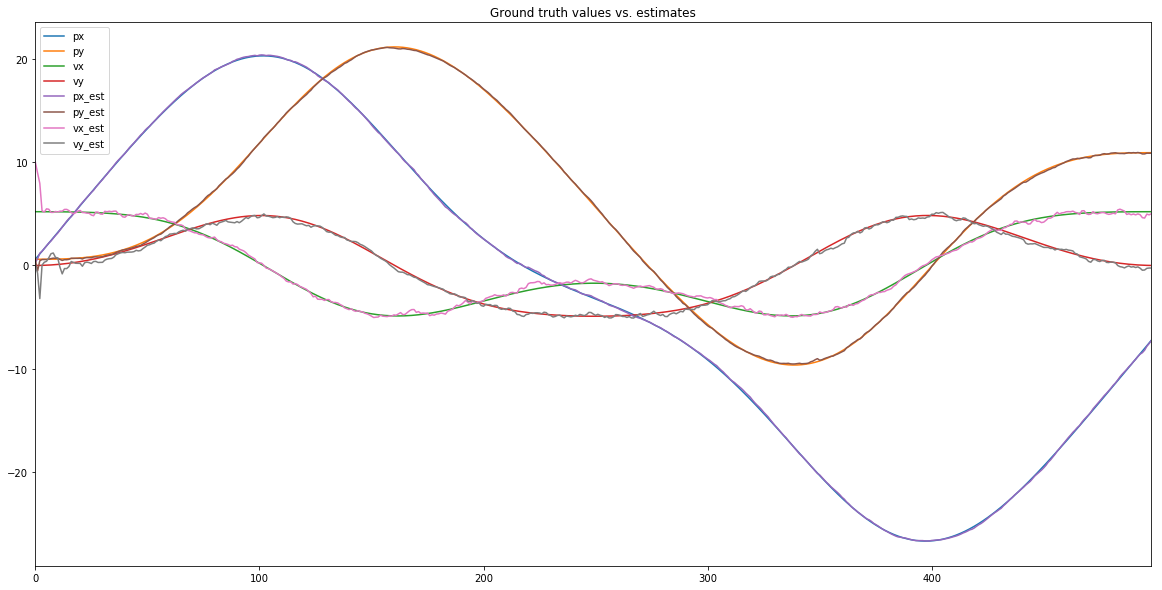

In [157]:
_ = df[df.columns[1:9]].plot(figsize=(20, 10), title="Ground truth values vs. estimates")

## NIS RADAR

In [158]:
chi2_radar_threshold = stats.chi2(3).ppf(0.95)
chi2_radar_threshold

7.8147279032511765

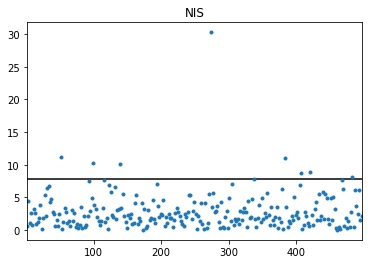

In [159]:
plt.hlines(chi2_radar_threshold, 0, 1000)
_ = df[df.Sensor == 'R'].NIS.plot(title='NIS', style='.')

## NIS LIDAR

In [160]:
chi2_lidar_threshold = stats.chi2(2).ppf(0.95)
chi2_lidar_threshold

5.9914645471079799

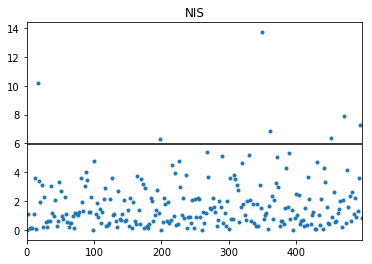

In [161]:
plt.hlines(chi2_lidar_threshold, 0, 1000)
_ = df[df.Sensor == 'L'].NIS.plot(title='NIS', style='.')